Напишем парсер погоды с сервиса openweather для дальнейшего использования в удобном виде.

In [1]:

import seaborn as sns 
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


Запишем полученный API на сайте сервиса 

In [2]:
api = '79d1ca96933b0328e1c7e3e7a26cb347'

In [12]:
import requests

api_key = '79d1ca96933b0328e1c7e3e7a26cb347'
city = 'Ростов-на-Дону'  
url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&cnt=40&appid={api_key}&units=metric'

data = requests.get(url).json()

In [44]:
weather_data = []

# Итерируемся по прогнозам и добавляем данные в список
for forecast in data['list']:
    weather_data.append({
        
        'Дата и время': forecast['dt_txt'],
        'Минимальная температура': forecast['main']['temp_min'],
        'Температура': forecast['main']['temp'],
        'Максимальная температура': forecast['main']['temp_max'],
        'Влажность': forecast['main']['humidity'],
        'Видимость': forecast['visibility'],
        'Скорость ветра': forecast['wind']['speed'],
        'Направление ветра': forecast['wind']['deg'],
        'Порывы': forecast['wind']['gust'],
        'Описание': forecast['weather'][0]['description']
    })

# Создаем DataFrame из списка данных
df = pd.DataFrame(weather_data)
df['Дата и время'] = df['Дата и время'].astype("datetime64[ns]")

Преобразуем направление ветра в читабельный вид.

In [45]:
df['Направление ветра'] = df['Направление ветра'].apply(lambda x:'C' if x <= 22 or x > 337 else 
                              ('CВ' if x <= 67 else
                              ('В' if x <= 112 else
                              ('ЮВ' if x <= 157 else
                              ('Ю' if x <= 202 else
                              ('ЮЗ' if x <= 247 else
                              ('З' if x <= 292 else 'СЗ')))))))
df.head()

,Дата и время,Минимальная температура,Температура,Максимальная температура,Влажность,Видимость,Скорость ветра,Направление ветра,Порывы,Описание
0,2024-02-26 21:00:00,-0.09,2.68,2.68,49,10000,8.07,В,18.00,clear sky
1,2024-02-27 00:00:00,-1.11,0.62,0.62,57,10000,7.79,В,17.22,clear sky
2,2024-02-27 03:00:00,-1.23,-1.23,-1.23,66,10000,7.78,В,17.54,clear sky
3,2024-02-27 06:00:00,0.17,0.17,0.17,61,10000,8.08,В,17.44,clear sky
4,2024-02-27 09:00:00,4.89,4.89,4.89,42,10000,8.86,В,14.18,clear sky


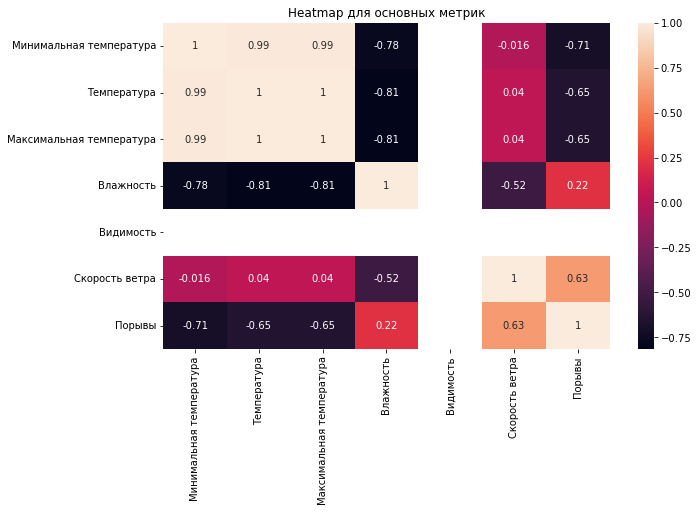

In [46]:
# Проверим корреляцию между метриками.
plt.figure(figsize=(10,6))
plt.title('Heatmap для основных метрик')
sns.heatmap((df.corr()), annot=True)
plt.show()

Посмотрим на разброс минимальной, средней и максимальной температуры в течении нескольких дней.

In [47]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Дата и время'], y=df['Температура'],
                    mode='lines+markers',
                    name='Температура'))
fig.add_trace(go.Scatter(x=df['Дата и время'], y=df['Минимальная температура'],
                    mode='lines+markers',
                    name='Минимальная температура'))
fig.add_trace(go.Scatter(x=df['Дата и время'], y=df['Максимальная температура'],
                    mode='lines+markers', 
                    name='Максимальная температура'))

fig.show()

Так как разницы между максимальной, средней и минимальной температурой нет, удалим ненужные колонки для получения данных в удобном виде.

In [48]:
df = df.drop(columns=['Минимальная температура','Максимальная температура'])
df.head()

,Дата и время,Температура,Влажность,Видимость,Скорость ветра,Направление ветра,Порывы,Описание
0,2024-02-26 21:00:00,2.68,49,10000,8.07,В,18.00,clear sky
1,2024-02-27 00:00:00,0.62,57,10000,7.79,В,17.22,clear sky
2,2024-02-27 03:00:00,-1.23,66,10000,7.78,В,17.54,clear sky
3,2024-02-27 06:00:00,0.17,61,10000,8.08,В,17.44,clear sky
4,2024-02-27 09:00:00,4.89,42,10000,8.86,В,14.18,clear sky
